In [1]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [2]:
train = pd.read_csv('../Train/train_set_geo_levels_sum_mult.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_multiply,geo_level_sum,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,1,24381,270,37,35642556,12691,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,1,19080,199,16,20246400,3720,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,1,14889,1760,136,68401179,9357,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,1,6252,205,31,98342024,11134,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,1,8220,1038,122,2144208,1630,3


In [3]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
params = {
    'boosting_type': ['gbdt'],
    'num_leaves': [10, 20, 30, 50],
    'max_depth': [10, 20, 50, None],
    'learning_rate': [0.1, 0.4, 0.5],
    'n_estimators': [30, 40, 60],
    'objective': ['multiclass'],
    'random_state': [123],
    'silent': [True],
    'force_row_wise': [False],
    'force_col_wise': [False]
}

In [9]:
opt = GridSearchCV(lgb.LGBMClassifier(), params, cv=10)
opt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'], 'force_col_wise': [False],
                         'force_row_wise': [False],
                         'learning_rate': [0.1, 0.4, 0.5],
                         'max_depth': [10, 20, 50, None],
                         'n_estimators': [30, 40, 60],
                         'num_leaves': [10, 20, 30, 50],
                         'objective': ['multiclass'], 'random_state': [123],
                         'silent': [True]})

In [6]:
opt.best_estimator_

LGBMClassifier(force_col_wise=False, force_row_wise=False, learning_rate=0.5,
               max_depth=10, n_estimators=40, num_leaves=30,
               objective='multiclass', random_state=123)

In [7]:
preds = opt.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F-Mean Score: %f" % (f1))

F-Mean Score: 0.725830


In [10]:
lgb_model = lgb.LGBMClassifier(force_col_wise=False, force_row_wise=False, learning_rate=0.5,
               max_depth=10, n_estimators=40, num_leaves=30,
               objective='multiclass', random_state=123)
lgb_model.fit(X_train, y_train)
preds = lgb_model.predict(X_test)
f1 = f1_score(y_test, preds, average='micro'),
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.725830


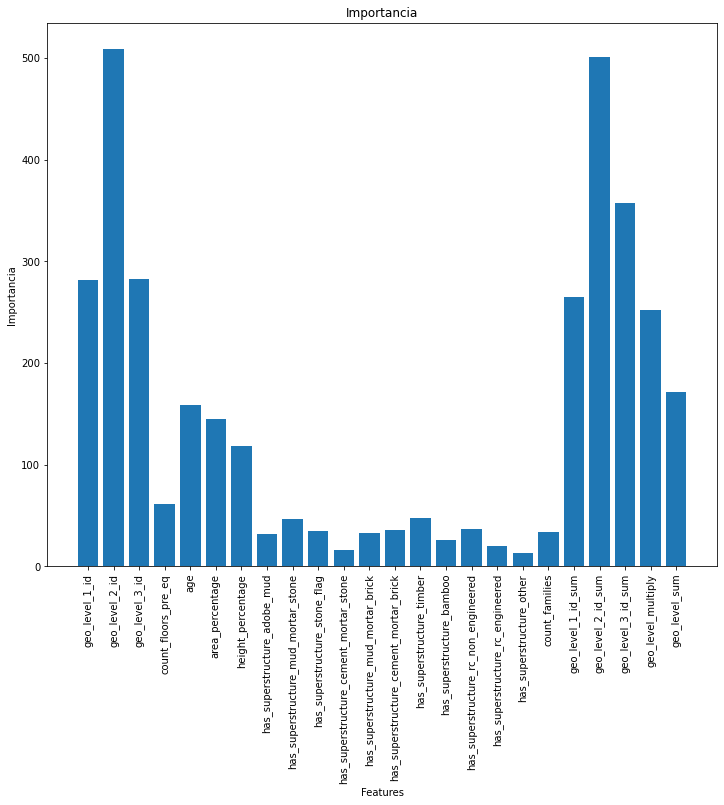

In [11]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, lgb_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia')
plt.show()

## Test

In [12]:
test = pd.read_csv('../Test/test_set_geo_levels_sum_mult.csv')

test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_sum,geo_level_multiply
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,1,7452,45,4,11920,114562524
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,1,8104,65,3,12134,10141002
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,1,2106,17,4,10085,4198392
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,2,7387,1329,190,698,641862
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,1,7452,62,7,8276,39156610


In [13]:
ids = test['building_id']

test.drop('building_id', axis='columns', inplace=True)

test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_sum,geo_level_multiply
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,0,0,1,7452,45,4,11920,114562524
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,0,0,1,8104,65,3,12134,10141002
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,0,0,1,2106,17,4,10085,4198392
3,26,39,633,1,0,19,3,0,0,0,...,0,0,0,0,2,7387,1329,190,698,641862
4,17,289,7970,3,15,8,7,0,1,0,...,0,0,0,0,1,7452,62,7,8276,39156610


In [17]:
preds = lgb_model.predict(test)

In [18]:
test['damage_grade'] = preds
test['building_id'] = ids

result = test[['building_id', 'damage_grade']]

result.head()

,building_id,damage_grade
0,300051,2
1,99355,3
2,890251,2
3,745817,2
4,421793,2


In [19]:
result.to_csv('../preds_lgb_v6.csv', index=False)